_Lambda School Data Science_

# Sequence your narrative

Today we will create a sequence of visualizations inspired by [Hans Rosling's 200 Countries, 200 Years, 4 Minutes](https://www.youtube.com/watch?v=jbkSRLYSojo).

Using this [data from Gapminder](https://github.com/open-numbers/ddf--gapminder--systema_globalis/):
- [Income Per Person (GDP Per Capital, Inflation Adjusted) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv)
- [Life Expectancy (in Years) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv)
- [Population Totals, by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv)
- [Entities](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv)
- [Concepts](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv)

Objectives
- sequence multiple visualizations
- combine qualitative anecdotes with quantitative aggregates

Links
- [Hans Rosling’s TED talks](https://www.ted.com/speakers/hans_rosling)
- [Spiralling global temperatures from 1850-2016](https://twitter.com/ed_hawkins/status/729753441459945474)
- "[The Pudding](https://pudding.cool/) explains ideas debated in culture with visual essays."
- [A Data Point Walks Into a Bar](https://lisacharlotterost.github.io/2016/12/27/datapoint-in-bar/): a thoughtful blog post about emotion and empathy in data storytelling

## Make a plan

#### How to present the data?

Variables --> Visual Encodings
- Income --> x
- Lifespan --> y
- Region --> color
- Population --> size
- Year --> animation frame (alternative: small multiple)
- Country --> annotation

Qualitative --> Verbal
- Editorial / contextual explanation --> audio narration (alternative: text)


#### How to structure the data?

| Year | Country | Region   | Income | Lifespan | Population |
|------|---------|----------|--------|----------|------------|
| 1818 | USA     | Americas | ###    | ##       | #          |
| 1918 | USA     | Americas | ####   | ###      | ##         |
| 2018 | USA     | Americas | #####  | ###      | ###        |
| 1818 | China   | Asia     | #      | #        | #          |
| 1918 | China   | Asia     | ##     | ##       | ###        |
| 2018 | China   | Asia     | ###    | ###      | #####      |


## Upgrade Seaborn

Make sure you have at least version 0.9.0.

In Colab, go to **Restart runtime** after you run the `pip` command.

In [1]:
!pip install --upgrade seaborn

Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.9.0)


In [2]:
import seaborn as sns
sns.__version__

'0.9.0'

## More imports

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Load & look at data

In [0]:
income = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv')

In [0]:
lifespan = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv')

In [0]:
population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')

In [0]:
entities = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')

In [0]:
concepts = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv')

In [9]:
income.shape, lifespan.shape, population.shape, entities.shape, concepts.shape

((46513, 3), (44370, 3), (59297, 3), (273, 33), (590, 16))

In [10]:
income.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted
0,afg,1800,603
1,afg,1801,603
2,afg,1802,603
3,afg,1803,603
4,afg,1804,603


In [11]:
lifespan.head()

,geo,time,life_expectancy_years
0,abw,1800,34.42
1,abw,1801,34.42
2,abw,1802,34.42
3,abw,1803,34.42
4,abw,1804,34.42


In [12]:
population.head()

,geo,time,population_total
0,afg,1800,3280000
1,afg,1801,3280000
2,afg,1802,3280000
3,afg,1803,3280000
4,afg,1804,3280000


In [62]:
pd.options.display.max_columns = 500
entities.head()

,country,alt_5,alternative_1,alternative_2,alternative_3,alternative_4_cdiac,arb1,arb2,arb3,arb4,arb5,arb6,g77_and_oecd_countries,gapminder_list,god_id,gwid,income_groups,is--country,iso3166_1_alpha2,iso3166_1_alpha3,iso3166_1_numeric,iso3166_2,landlocked,latitude,longitude,main_religion_2008,name,pandg,un_state,unicode_region_subtag,upper_case_name,world_4region,world_6region
0,abkh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Abkhazia,GE-AB,i0,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abkhazia,NaN,False,NaN,NaN,europe,europe_central_asia
1,abw,NaN,NaN,NaN,NaN,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,others,Aruba,AW,i12,high_income,True,AW,ABW,533.0,NaN,coastline,12.50000,-69.96667,christian,Aruba,NaN,False,AW,ARUBA,americas,america
2,afg,NaN,Islamic Republic of Afghanistan,NaN,NaN,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,g77,Afghanistan,AF,i1,low_income,True,AF,AFG,4.0,NaN,landlocked,33.00000,66.00000,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia
3,ago,NaN,NaN,NaN,NaN,Angola,NaN,NaN,NaN,NaN,NaN,NaN,g77,Angola,AO,i7,upper_middle_income,True,AO,AGO,24.0,NaN,coastline,-12.50000,18.50000,christian,Angola,ANGOLA,True,AO,ANGOLA,africa,sub_saharan_africa
4,aia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Anguilla,AI,i8,NaN,True,AI,AIA,660.0,NaN,coastline,18.21667,-63.05000,christian,Anguilla,NaN,False,AI,ANGUILLA,americas,america


In [64]:
entities.world_4region.value_counts()
entities.world_6region.value_counts()

europe_central_asia         77
sub_saharan_africa          53
america                     53
east_asia_pacific           46
middle_east_north_africa    23
south_asia                   8
Name: world_6region, dtype: int64

In [14]:
concepts.head()

,concept,color,concept_type,description,description_long,domain,drill_up,indicator_url,name,name_catalog,name_short,scales,source,source_long,source_url,tags
0,adults_with_hiv_percent_age_15_49,NaN,measure,The estimated percentage of adults aged 15 to ...,NaN,NaN,NaN,NaN,"Adults with HIV (%, age 15-49)","Adults with HIV (%, age 15-49)",Adults with HIV,"[""log"", ""linear""]",NaN,NaN,https://www.gapminder.org/gapminder-world/docu...,hiv
1,age_at_1st_marriage_women,NaN,measure,"The mean age, in years, of first marriage for ...",NaN,NaN,NaN,NaN,Age at 1st marriage (women),Age at 1st marriage (women),Age at 1st marriage,"[""linear"", ""log""]",NaN,NaN,https://www.gapminder.org/data/documentation/g...,population
2,aged_15_24_employment_rate_percent,NaN,measure,"Percentage of total population, age group 15-2...",NaN,NaN,NaN,NaN,Aged 15-24 employment rate (%),Aged 15-24,Employment rate (%),"[""linear"", ""log""]",NaN,NaN,https://www.ilo.org/ilostat/,employment_rate
3,aged_15_24_unemployment_rate_percent,NaN,measure,"Percentage of total population, age group 15-2...",NaN,NaN,NaN,NaN,Aged 15-24 unemployment rate (%),Aged 15-24,Unemployment rate (%),"[""linear"", ""log""]",NaN,NaN,https://www.ilo.org/ilostat/,unemployment
4,aged_15_64_labour_force_participation_rate_per...,NaN,measure,"For age group 15-64, percentage of all labour ...",NaN,NaN,NaN,NaN,Aged 15-64 labour force participation rate (%),Aged 15-64,Labour force participation rate (%),"[""linear"", ""log""]",NaN,NaN,https://www.ilo.org/ilostat/,labour_force_participation


## Merge data

https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf

In [68]:
temp = income.merge(lifespan)
temp.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years
0,afg,1800,603,28.21
1,afg,1801,603,28.20
2,afg,1802,603,28.19
3,afg,1803,603,28.18
4,afg,1804,603,28.17


In [70]:
temp1 = temp.merge(population)
temp1.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total
0,afg,1800,603,28.21,3280000
1,afg,1801,603,28.20,3280000
2,afg,1802,603,28.19,3280000
3,afg,1803,603,28.18,3280000
4,afg,1804,603,28.17,3280000


In [83]:
final = temp1.merge(entities[['country', 'name', 'world_6region']],
                   how='inner', left_on='geo', right_on='country')
print(final.shape)
final.head()

(40437, 8)


,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total,country,name,world_6region
0,afg,1800,603,28.21,3280000,afg,Afghanistan,south_asia
1,afg,1801,603,28.20,3280000,afg,Afghanistan,south_asia
2,afg,1802,603,28.19,3280000,afg,Afghanistan,south_asia
3,afg,1803,603,28.18,3280000,afg,Afghanistan,south_asia
4,afg,1804,603,28.17,3280000,afg,Afghanistan,south_asia


In [84]:
final = final.drop(columns=['geo', 'country'])
final = final.rename(columns={
    'time': 'year',
    'income_per_person_gdppercapita_ppp_inflation_adjusted': 'income',
    'life_expectancy_years': 'lifespan',
    'population_total': 'population',
    'name': 'country',
    'world_4region': 'region4',
    'world_6region': 'region6'
})
print(final.shape)
final.head()

(40437, 6)


,year,income,lifespan,population,country,region6
0,1800,603,28.21,3280000,Afghanistan,south_asia
1,1801,603,28.20,3280000,Afghanistan,south_asia
2,1802,603,28.19,3280000,Afghanistan,south_asia
3,1803,603,28.18,3280000,Afghanistan,south_asia
4,1804,603,28.17,3280000,Afghanistan,south_asia


In [85]:
final.describe()

,year,income,lifespan,population
count,40437.000000,40437.000000,40437.000000,4.043700e+04
mean,1909.292900,4619.492717,43.132080,1.371204e+07
std,63.308682,10209.571045,16.313228,6.606335e+07
min,1800.000000,247.000000,1.000000,2.128000e+03
25%,1854.000000,876.000000,31.160000,4.113310e+05
50%,1909.000000,1442.000000,35.500000,1.985952e+06
75%,1964.000000,3488.000000,55.970000,6.499707e+06
max,2018.000000,177522.000000,84.170000,1.415046e+09


In [86]:
final.describe(exclude='number')

,country,region6
count,40437,40437
unique,187,6
top,Panama,europe_central_asia
freq,219,10778


In [92]:
china = final[final.country == 'China']
china[china.year.isin([1818,1918,2018])]

,year,income,lifespan,population,country,region6
6854,1818,985,32.00,374161494,China,east_asia_pacific
6954,1918,989,22.13,462444535,China,east_asia_pacific
7054,2018,16018,76.92,1415045928,China,east_asia_pacific


In [93]:
now = final[final.year == 2018]
now.shape

(184, 6)

## Explore data

In [114]:
qatar = now[now.country == 'Qatar']
qatar_income = qatar.income.value[0]
qatar_lifespan = qatar.income.value[0]

AttributeError: ignored

## Plot visualization

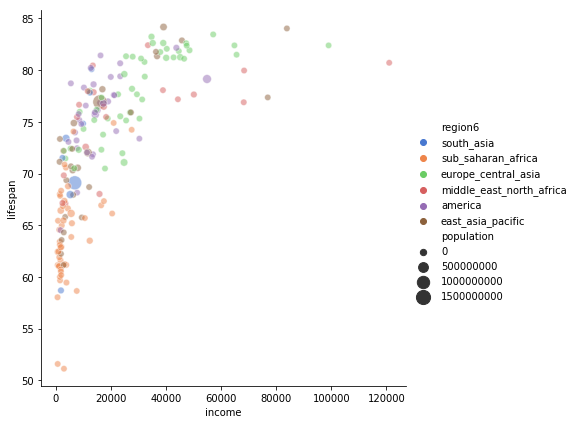

In [98]:
sns.relplot(x='income', y='lifespan', hue='region6', size='population',
          sizes=(40,200), alpha=.5, palette='muted', height=6, data=now);

plt.title('Qatar has the highest')
plt.text(x=qatar_income-7000, y=qatar_lifespan+1, s='Qatar')

## Analyze outliers

In [101]:
now[now.income > 80000].sort_values(by='income', ascending=False)

,year,income,lifespan,population,country,region6
30362,2018,121033,80.71,2694849,Qatar,middle_east_north_africa
22212,2018,99034,82.39,590321,Luxembourg,europe_central_asia
31895,2018,83888,84.03,5791901,Singapore,east_asia_pacific


In [0]:
qatar = now[now.country == 'Qatar']
qatar_income = qatar.income.value[0]
qatar_lifespan = qatar.income.value[0]

NameError: ignored

## Plot multiple years

In [110]:
years = [1818, 1918, 2018]
centuries = final[final.year.isin(years)]
centuries.shape

(552, 6)

## Point out a story

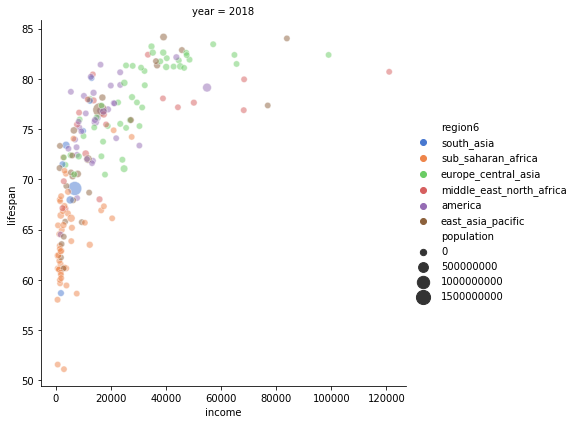

In [112]:
sns.relplot(x='income', y='lifespan', hue='region6', size='population', col='year',
          sizes=(40,200), alpha=.5, palette='muted', height=6, data=now);


## Code Challenge

In [61]:
def array_product(input_array, array_length): 
    left = [0]*array_length 
    right = [0]*array_length 
    prod = [0]*array_length 
  
    # Left most element of left array is always 1 
    left[0] = 1
  
    # Rightmost most element of right array is always 1 
    right[array_length - 1] = 1
  
    # Construct the left array 
    for x in range(1, array_length): 
        left[x] = input_array[x - 1] * left[x - 1] 
  
    # Construct the right array 
    for y in range(array_length-2, -1, -1): 
        right[y] = input_array[y + 1] * right[y + 1] 
  
    # Construct the product array using 
    for i in range(array_length): 
        prod[i] = left[i] * right[i] 
  
    # print the constructed prod array 
    for i in range(array_length): 
        print(prod[i], end=' ')
    
    print('\n')
    

test = [1, 2, 3, 4, 5] 
n = len(test) 

array_product(test, n) 

test1 = [3,2,1]
n = len(test1)

array_product(test1, n)
    

120 60 40 30 24 

2 3 6 



# ASSIGNMENT
Replicate the lesson code

# STRETCH OPTIONS

## 1. Animate!
- [Making animations work in Google Colaboratory](https://medium.com/lambda-school-machine-learning/making-animations-work-in-google-colaboratory-new-home-for-ml-prototyping-c6147186ae75)
- [How to Create Animated Graphs in Python](https://towardsdatascience.com/how-to-create-animated-graphs-in-python-bb619cc2dec1)
- [The Ultimate Day of Chicago Bikeshare](https://chrisluedtke.github.io/divvy-data.html) (Lambda School Data Science student)

## 2. Work on anything related to your portfolio site / project

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [0]:
overdoses = pd.read_excel('/content/overdose_data_1999-2015.xls',sheet_name='Online',skiprows =6)
overdoses.head(20)

,Unnamed: 0,Unnamed: 1,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,NaN,Total Overdose Deaths,16849.0,17415.0,19394.0,23518.0,25785.0,27424.0,29813.0,34425.0,36010.0,36450.0,37004.0,38329.0,41340.0,41502.0,43982.0,47055.0,52404.0
1,NaN,Female,5591.0,5852.0,6736.0,8490.0,9386.0,10304.0,11089.0,12532.0,13712.0,13982.0,14411.0,15323.0,16352.0,16390.0,17183.0,18243.0,19447.0
2,NaN,Male,11258.0,11563.0,12658.0,15028.0,16399.0,17120.0,18724.0,21893.0,22298.0,22468.0,22593.0,23006.0,24988.0,25112.0,26799.0,28812.0,32957.0
3,NaN,Prescription Drugs1,7523.0,7885.0,9197.0,11529.0,12640.0,14153.0,15352.0,18559.0,19601.0,20044.0,20848.0,22134.0,22810.0,22114.0,22767.0,25760.0,29728.0
4,NaN,Female,3011.0,3196.0,3790.0,4765.0,5191.0,5980.0,6351.0,7553.0,8251.0,8275.0,8740.0,9292.0,9771.0,9632.0,10019.0,11181.0,12218.0
5,NaN,Male,4512.0,4689.0,5407.0,6764.0,7449.0,8173.0,9001.0,11006.0,11350.0,11769.0,12108.0,12842.0,13039.0,12482.0,12748.0,14579.0,17510.0
6,NaN,Opioid Pain Relievers2,4030.0,4400.0,5528.0,7456.0,8517.0,9857.0,10928.0,13723.0,14408.0,14800.0,15597.0,16651.0,16917.0,16007.0,16235.0,18893.0,22598.0
7,NaN,Female,1287.0,1534.0,1969.0,2761.0,3173.0,3758.0,4188.0,5058.0,5630.0,5733.0,6213.0,6631.0,6903.0,6745.0,6992.0,7924.0,8786.0
8,NaN,Male,2743.0,2866.0,3559.0,4695.0,5344.0,6099.0,6740.0,8665.0,8778.0,9067.0,9384.0,10020.0,10014.0,9262.0,9243.0,10969.0,13812.0
9,NaN,Benzodiazepines3,1135.0,1298.0,1594.0,2022.0,2248.0,2627.0,3084.0,3835.0,4500.0,5010.0,5567.0,6497.0,6872.0,6524.0,6973.0,7945.0,8791.0


In [0]:
def get_data(table,rownum,title):
    data = pd.DataFrame(table.loc[rownum][2:]).astype(float)
    data.columns = {title}
    return data

In [0]:
%matplotlib notebook
title = 'Heroin Overdoses'
d = get_data(overdoses,18,title)
d.head()


,Heroin Overdoses
1999,1960.0
2000,1842.0
2001,1779.0
2002,2089.0
2003,2080.0


In [0]:
def augment(xold,yold,numsteps):
    xnew = []
    ynew = []
    for i in range(len(xold)-1):
        difX = xold[i+1]-xold[i]
        stepsX = difX/numsteps
        difY = yold[i+1]-yold[i]
        stepsY = difY/numsteps
        for s in range(numsteps):
            xnew = np.append(xnew,xold[i]+s*stepsX)
            ynew = np.append(ynew,yold[i]+s*stepsY)
    return xnew,ynew

In [0]:
x = np.array(d.index)
y = np.array(d['Heroin Overdoses'])
overdose = pd.DataFrame(y,x)
XN,YN = augment(x,y,10)
augmented = pd.DataFrame(YN,XN)
overdose.columns = {title}

In [0]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=20, metadata=dict(artist='Me'), bitrate=1800)

In [0]:
fig = plt.figure(figsize=(10,6))
plt.xlim(1999, 2016)
plt.ylim(np.min(overdose)[0], np.max(overdose)[0])
plt.xlabel('Year',fontsize=20)
plt.ylabel(title,fontsize=20)
plt.title('Heroin Overdoses per Year',fontsize=20)

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Heroin Overdoses per Year')

In [0]:
def animate(i):
    data = overdose.iloc[:int(i+1)] #select data range
    p = sns.lineplot(x=data.index, y=data[title], data=data, color="r")
    p.tick_params(labelsize=17)
    plt.setp(p.lines,linewidth=7)

In [0]:
sns.set(rc={'axes.facecolor':'lightgrey', 'figure.facecolor':'lightgrey','figure.edgecolor':'black','axes.grid':False})

In [0]:
ani = matplotlib.animation.FuncAnimation(fig, animate, frames=17, repeat=True)
ani.save('HeroinOverdosesJumpy.mp4', writer=writer)